In [1]:
import pandas as pd
import statsmodels.api as sm


In [2]:
data = pd.read_csv('HW3_Data.csv')

In [3]:
# Define the dependent variable (Income)
Y = data['INCOME']

# Model 1: Income = β0 + β1 * MF_DUMMY + ε
X1 = sm.add_constant(data['MF_DUMMY'])
model1 = sm.OLS(Y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     11.68
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           0.000683
Time:                        04:05:05   Log-Likelihood:                -5998.7
No. Observations:                 500   AIC:                         1.200e+04
Df Residuals:                     498   BIC:                         1.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.092e+05   2386.395     45.746      0.0

In [4]:
# Model 2: Income = β0 + β1 * MF_DUMMY + β2 * Years_Experience + ε
X2 = sm.add_constant(data[['MF_DUMMY', 'Years_Experience']])
model2 = sm.OLS(Y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     3220.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          3.33e-285
Time:                        04:05:09   Log-Likelihood:                -5345.5
No. Observations:                 500   AIC:                         1.070e+04
Df Residuals:                     497   BIC:                         1.071e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.402e+04   1046.105  

In [5]:
# Model 3: Income = β0 + β1 * MF_DUMMY + β2 * Years_Experience + β3 * (Years_Experience * MF_DUMMY) + ε
data['Interaction'] = data['Years_Experience'] * data['MF_DUMMY']
X3 = sm.add_constant(data[['MF_DUMMY', 'Years_Experience', 'Interaction']])
model3 = sm.OLS(Y, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2492.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.39e-298
Time:                        04:05:11   Log-Likelihood:                -5310.2
No. Observations:                 500   AIC:                         1.063e+04
Df Residuals:                     496   BIC:                         1.065e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.035e+04   1219.070  

In [6]:
# Model 4: Income = β0 + β1 * MF_DUMMY + β2 * Years_Experience + β3 * (Years_Experience * MF_DUMMY) + β4 * (Years_Experience^2) + ε
data['Years_Exp_Squared'] = data['Years_Experience'] ** 2
X4 = sm.add_constant(data[['MF_DUMMY', 'Years_Experience', 'Interaction', 'Years_Exp_Squared']])
model4 = sm.OLS(Y, X4).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1866.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          6.64e-297
Time:                        04:05:13   Log-Likelihood:                -5310.1
No. Observations:                 500   AIC:                         1.063e+04
Df Residuals:                     495   BIC:                         1.065e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.088e+04   1609.49

In [7]:

# Custom Model I did using the most significant independent variables "Interaction" and "Years_Experience"
X5 = sm.add_constant(data[['Years_Experience','Interaction']])
model5 = sm.OLS(Y,X5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     3744.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          2.15e-300
Time:                        04:06:22   Log-Likelihood:                -5310.3
No. Observations:                 500   AIC:                         1.063e+04
Df Residuals:                     497   BIC:                         1.064e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.004e+04    883.542  

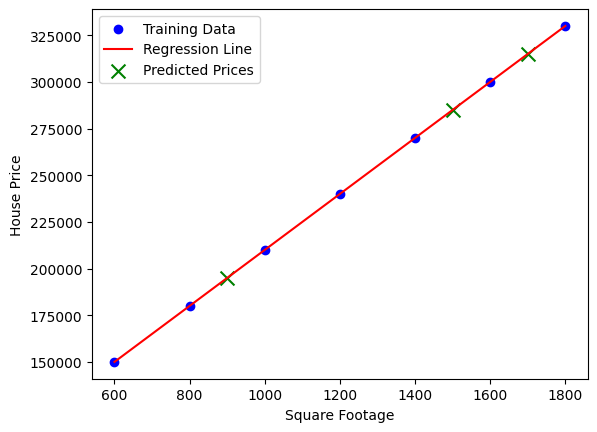

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data (house size in square feet vs. price)
X = np.array([600, 800, 1000, 1200, 1400, 1600, 1800]).reshape(-1, 1)  # Square footage
y = np.array([150000, 180000, 210000, 240000, 270000, 300000, 330000])  # House price

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict prices for new house sizes
X_test = np.array([900, 1500, 1700]).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X, y, color='blue', label="Training Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.scatter(X_test, y_pred, color='green', marker='x', s=100, label="Predicted Prices")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.legend()
plt.show()


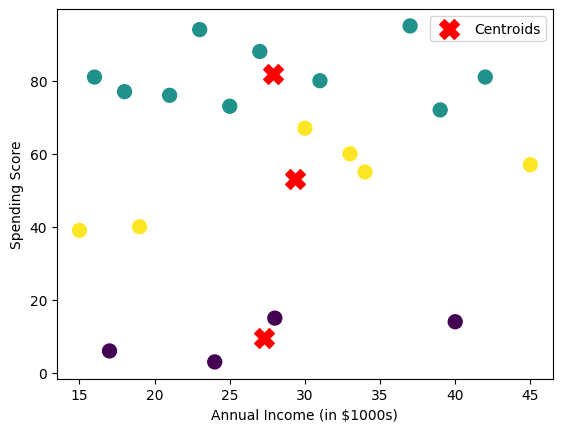

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate sample data (Annual Income, Spending Score)
X = np.array([
    [15, 39], [16, 81], [17, 6], [18, 77], [19, 40], [21, 76], [23, 94],
    [24, 3], [25, 73], [27, 88], [28, 15], [30, 67], [31, 80], [33, 60],
    [34, 55], [37, 95], [39, 72], [40, 14], [42, 81], [45, 57]
])

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label="Centroids")
plt.xlabel("Annual Income (in $1000s)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [5]:
import numpy as np

# Define the grid world (5x5 grid)
grid_size = 5
rewards = np.zeros((grid_size, grid_size))
rewards[4, 4] = 1  # Goal state

# Initialize Q-table
Q = np.zeros((grid_size, grid_size, 4))  # 4 possible actions (up, down, left, right)
actions = [(0,1), (0,-1), (1,0), (-1,0)]  # Right, Left, Down, Up
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate

# Train for 500 episodes
for episode in range(500):
    state = (0, 0)  # Start state
    while state != (4, 4):  # Until goal is reached
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # Explore
        else:
            action = np.argmax(Q[state[0], state[1]])  # Exploit
        
        # Move in the chosen direction
        new_state = (max(0, min(grid_size-1, state[0] + actions[action][0])),
                     max(0, min(grid_size-1, state[1] + actions[action][1])))

        # Update Q-value
        Q[state[0], state[1], action] = (1 - alpha) * Q[state[0], state[1], action] + \
                                         alpha * (rewards[new_state[0], new_state[1]] + gamma * np.max(Q[new_state[0], new_state[1]]))
        state = new_state  # Move to new state

# Print trained Q-values
print("Trained Q-Table:\n", np.round(Q, 2))


Trained Q-Table:
 [[[0.48 0.41 0.18 0.4 ]
  [0.53 0.4  0.31 0.41]
  [0.59 0.45 0.4  0.5 ]
  [0.66 0.5  0.63 0.54]
  [0.63 0.58 0.73 0.61]]

 [[0.32 0.   0.   0.  ]
  [0.46 0.03 0.   0.11]
  [0.26 0.12 0.01 0.53]
  [0.73 0.09 0.11 0.15]
  [0.67 0.59 0.81 0.64]]

 [[0.   0.   0.   0.  ]
  [0.06 0.   0.   0.  ]
  [0.33 0.   0.   0.  ]
  [0.76 0.02 0.02 0.  ]
  [0.74 0.44 0.9  0.68]]

 [[0.   0.   0.   0.  ]
  [0.   0.   0.   0.  ]
  [0.   0.   0.   0.01]
  [0.82 0.   0.01 0.07]
  [0.86 0.58 1.   0.76]]

 [[0.   0.   0.   0.  ]
  [0.   0.   0.   0.  ]
  [0.   0.   0.   0.  ]
  [0.19 0.   0.   0.  ]
  [0.   0.   0.   0.  ]]]


In [1]:
def is_valid(board, row, col, num):
    """Check if placing 'num' at board[row][col] is valid according to Sudoku rules."""
    
    # Check row
    if num in board[row]:
        return False
    
    # Check column
    if num in [board[i][col] for i in range(9)]:
        return False

    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    
    return True

def find_empty_cell(board):
    """Find an empty cell in the Sudoku board (returns row, col)."""
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:  # Empty cell
                return i, j
    return None  # No empty cells

def solve_sudoku(board):
    """Solve the Sudoku puzzle using Backtracking."""
    empty = find_empty_cell(board)
    if not empty:
        return True  # No empty cells → Sudoku solved!
    
    row, col = empty
    
    for num in range(1, 10):  # Try numbers 1-9
        if is_valid(board, row, col, num):
            board[row][col] = num  # Place number
            
            if solve_sudoku(board):  # Recursively solve the next cell
                return True
            
            board[row][col] = 0  # Undo placement (backtrack)
    
    return False  # No solution found

def print_board(board):
    """Print the Sudoku board in a readable format."""
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - -")
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(board[i][j], end=" ")
        print()

# Example Sudoku puzzle (0 represents empty cells)
sudoku_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Original Sudoku Puzzle:")
print_board(sudoku_board)

if solve_sudoku(sudoku_board):
    print("\nSolved Sudoku:")
    print_board(sudoku_board)
else:
    print("\nNo solution exists.")


Original Sudoku Puzzle:
5 3 0 | 0 7 0 | 0 0 0 
6 0 0 | 1 9 5 | 0 0 0 
0 9 8 | 0 0 0 | 0 6 0 
- - - - - - - - - - -
8 0 0 | 0 6 0 | 0 0 3 
4 0 0 | 8 0 3 | 0 0 1 
7 0 0 | 0 2 0 | 0 0 6 
- - - - - - - - - - -
0 6 0 | 0 0 0 | 2 8 0 
0 0 0 | 4 1 9 | 0 0 5 
0 0 0 | 0 8 0 | 0 7 9 

Solved Sudoku:
5 3 4 | 6 7 8 | 9 1 2 
6 7 2 | 1 9 5 | 3 4 8 
1 9 8 | 3 4 2 | 5 6 7 
- - - - - - - - - - -
8 5 9 | 7 6 1 | 4 2 3 
4 2 6 | 8 5 3 | 7 9 1 
7 1 3 | 9 2 4 | 8 5 6 
- - - - - - - - - - -
9 6 1 | 5 3 7 | 2 8 4 
2 8 7 | 4 1 9 | 6 3 5 
3 4 5 | 2 8 6 | 1 7 9 


Iteration 0: MSE = 61200000000.00, m = 1200.0000, b = 4800.0000
Iteration 100: MSE = 1076382332.27, m = 52201.9701, b = 208807.8805
Iteration 200: MSE = 18931354.99, m = 58965.8287, b = 235863.3150
Iteration 300: MSE = 332963.66, m = 59862.8487, b = 239451.3947
Iteration 400: MSE = 5856.15, m = 59981.8111, b = 239927.2442
Iteration 500: MSE = 103.00, m = 59997.5878, b = 239990.3512
Iteration 600: MSE = 1.81, m = 59999.6801, b = 239998.7204
Iteration 700: MSE = 0.03, m = 59999.9576, b = 239999.8303
Iteration 800: MSE = 0.00, m = 59999.9944, b = 239999.9775
Iteration 900: MSE = 0.00, m = 59999.9993, b = 239999.9970


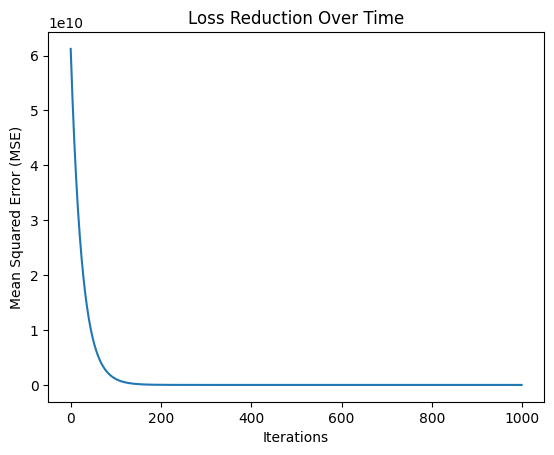

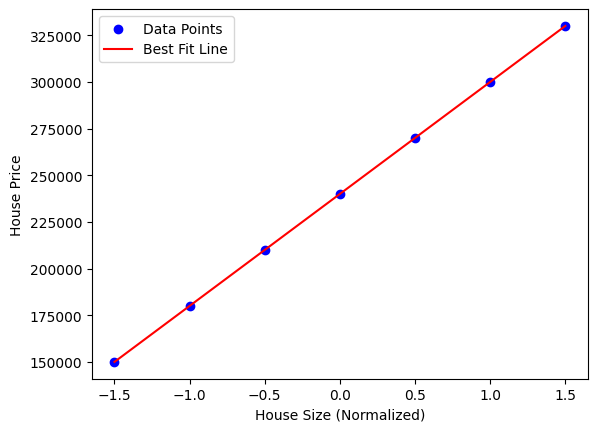

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data (House Size in Square Feet vs. Price)
X = np.array([600, 800, 1000, 1200, 1400, 1600, 1800])
y = np.array([150000, 180000, 210000, 240000, 270000, 300000, 330000])

# Normalize the data (for better convergence)
X = (X - np.mean(X)) / np.std(X)

# Hyperparameters
learning_rate = 0.01  # Step size
iterations = 1000  # Number of iterations
m, b = 0, 0  # Initialize parameters

n = len(X)  # Number of data points

# Perform Gradient Descent
loss_history = []  # Store loss at each iteration

for i in range(iterations):
    y_pred = m * X + b  # Predicted values
    error = y - y_pred  # Error (difference between actual and predicted)

    # Compute Gradients
    dm = (-2/n) * np.sum(X * error)  # Partial derivative wrt m
    db = (-2/n) * np.sum(error)  # Partial derivative wrt b

    # Update Parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Compute and store loss (MSE)
    mse = np.mean(error ** 2)
    loss_history.append(mse)

    # Print updates every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {mse:.2f}, m = {m:.4f}, b = {b:.4f}")

# Plot Loss Reduction
plt.plot(range(iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Reduction Over Time")
plt.show()

# Plot the final regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, m * X + b, color="red", label="Best Fit Line")
plt.xlabel("House Size (Normalized)")
plt.ylabel("House Price")
plt.legend()
plt.show()


Iteration 0: Sample Index=0, MSE=22500000000.00, m=-4500.0000, b=3000.0000
Iteration 100: Sample Index=5, MSE=1231921811.40, m=55853.6906, b=210451.5154
Iteration 200: Sample Index=6, MSE=11776523.40, m=60402.8272, b=236187.1254
Iteration 300: Sample Index=2, MSE=285619.53, m=60053.9994, b=239505.9267
Iteration 400: Sample Index=1, MSE=3141.30, m=59988.8986, b=239935.0932
Iteration 500: Sample Index=0, MSE=32.40, m=59997.7579, b=239991.3147
Iteration 600: Sample Index=4, MSE=1.33, m=59999.9097, b=239998.9206
Iteration 700: Sample Index=5, MSE=0.02, m=60000.0050, b=239999.8602
Iteration 800: Sample Index=1, MSE=0.00, m=60000.0075, b=239999.9806
Iteration 900: Sample Index=5, MSE=0.00, m=60000.0015, b=239999.9972


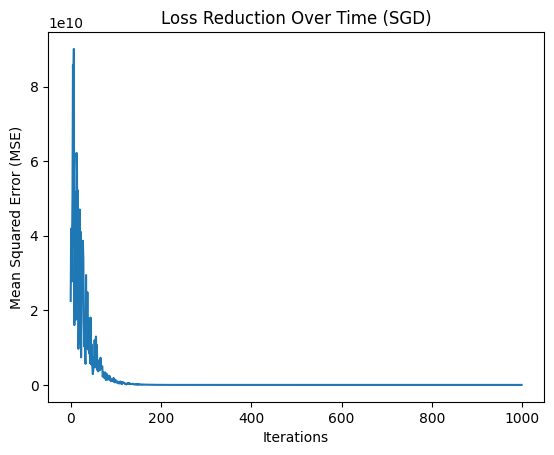

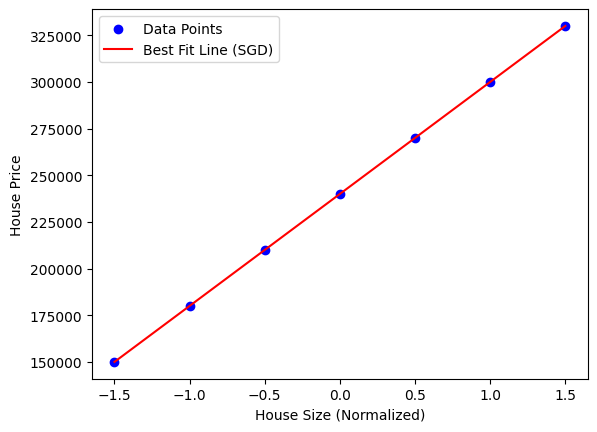

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data (House Size in Square Feet vs. Price)
X = np.array([600, 800, 1000, 1200, 1400, 1600, 1800])
y = np.array([150000, 180000, 210000, 240000, 270000, 300000, 330000])

# Normalize the data (for better convergence)
X = (X - np.mean(X)) / np.std(X)

# Hyperparameters
learning_rate = 0.01  # Step size
iterations = 1000  # Number of iterations
m, b = 0, 0  # Initialize parameters

n = len(X)  # Number of data points

# Perform Stochastic Gradient Descent
loss_history = []  # Store loss at each iteration

for i in range(iterations):
    random_index = np.random.randint(0, n)  # Select a random data point
    X_i = X[random_index]
    y_i = y[random_index]
    
    # Compute the prediction and error
    y_pred = m * X_i + b
    error = y_i - y_pred  

    # Compute Gradients (Using Single Data Point)
    dm = -2 * X_i * error  
    db = -2 * error  

    # Update Parameters
    m -= learning_rate * dm
    b -= learning_rate * db

    # Compute and store loss (MSE for that sample)
    mse = error ** 2
    loss_history.append(mse)

    # Print updates every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Sample Index={random_index}, MSE={mse:.2f}, m={m:.4f}, b={b:.4f}")

# Plot Loss Reduction
plt.plot(range(iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Reduction Over Time (SGD)")
plt.show()

# Plot the final regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, m * X + b, color="red", label="Best Fit Line (SGD)")
plt.xlabel("House Size (Normalized)")
plt.ylabel("House Price")
plt.legend()
plt.show()


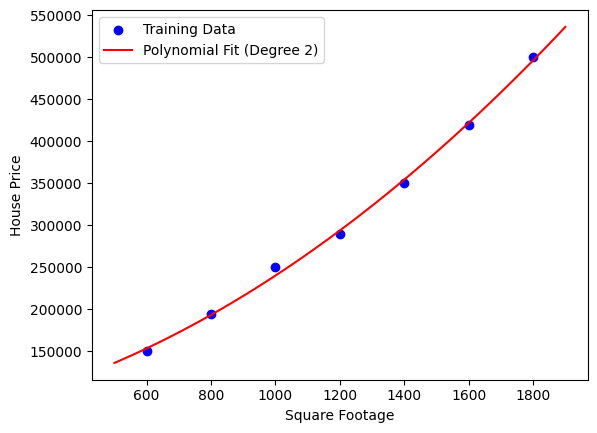

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample Non-Linear Data (e.g., Square Footage vs House Price)
X = np.array([600, 800, 1000, 1200, 1400, 1600, 1800]).reshape(-1, 1)
y = np.array([150000, 195000, 250000, 290000, 350000, 420000, 500000])  # Non-linear trend

# Transform X into Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
X_test = np.linspace(500, 1900, 100).reshape(-1, 1)  # Generate test data
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plot Results
plt.scatter(X, y, color='blue', label="Training Data")
plt.plot(X_test, y_pred, color='red', label="Polynomial Fit (Degree 2)")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.legend()
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.44892e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.372e+07, tolerance: 9.259e+06
  model = cd_fast.enet_coordinate_descent(


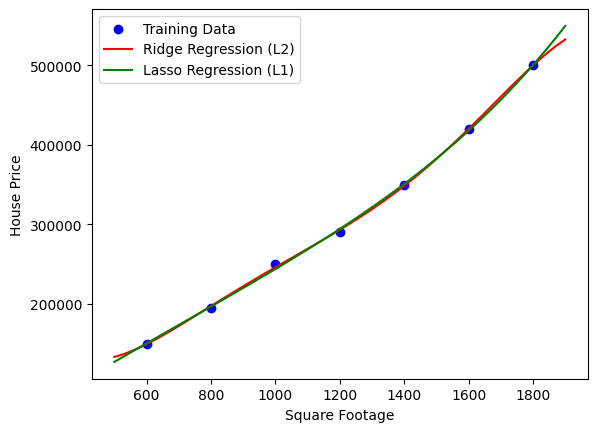

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# Sample Non-Linear Data
X = np.array([600, 800, 1000, 1200, 1400, 1600, 1800]).reshape(-1, 1)
y = np.array([150000, 195000, 250000, 290000, 350000, 420000, 500000])  # Non-linear trend

# Convert to Polynomial Features (Degree 5 to induce overfitting)
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Apply Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge_model.fit(X_poly, y)

# Apply Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=1000)  # Higher alpha increases feature selection effect
lasso_model.fit(X_poly, y)

# Generate Test Data
X_test = np.linspace(500, 1900, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)

# Predictions
y_ridge_pred = ridge_model.predict(X_test_poly)
y_lasso_pred = lasso_model.predict(X_test_poly)

# Plot Results
plt.scatter(X, y, color='blue', label="Training Data")
plt.plot(X_test, y_ridge_pred, color='red', label="Ridge Regression (L2)")
plt.plot(X_test, y_lasso_pred, color='green', label="Lasso Regression (L1)")
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.legend()
plt.show()


Model Accuracy: 0.97

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



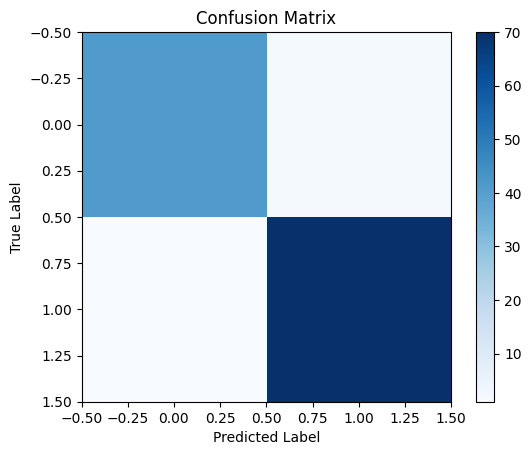

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0 = Benign, 1 = Malignant)

# Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Logistic Regression performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Plot Confusion Matrix
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Model Accuracy: 0.95

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



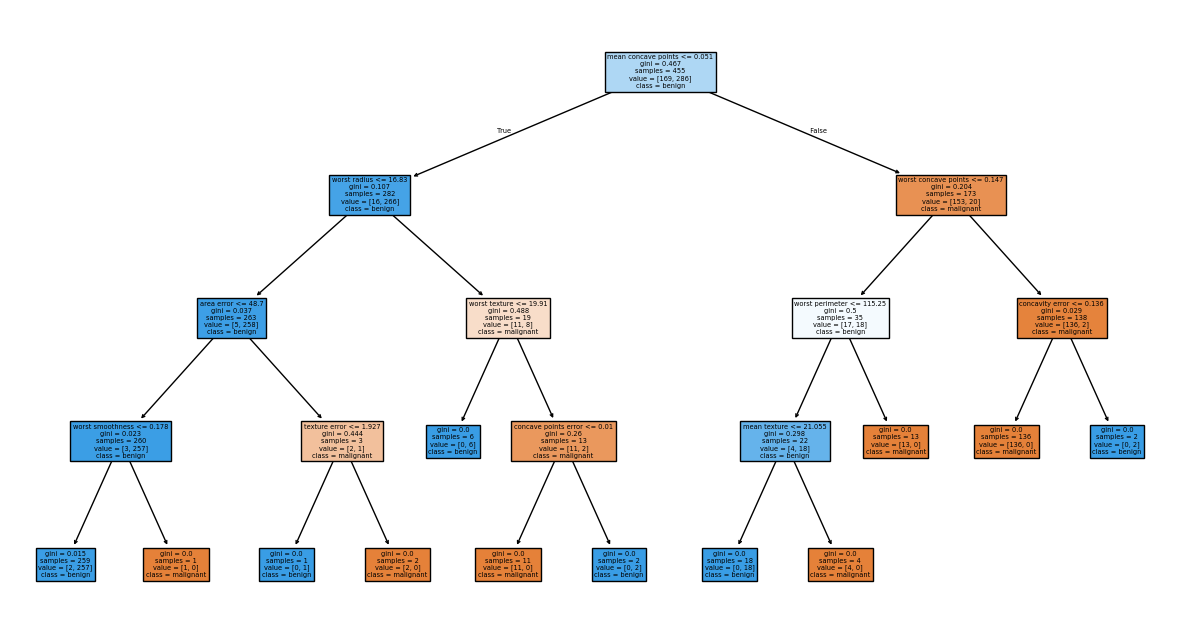

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0 = Benign, 1 = Malignant)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)  # Using Gini Impurity
tree_clf.fit(X_train, y_train)

# Make Predictions
y_pred = tree_clf.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualizing the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(tree_clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
